In [11]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [13]:
import pandas as pd

# Replace 'your_file.csv' with your file path
df = pd.read_csv("C:/Users/diya/OneDrive/เอกสาร/Desktop/trafficdatasetfinal.csv")

# Display the first 5 rows
df.head()

,timestamp,location_id,latitude,longitude,road_name,road_type,speed_limit,lane_count,direction,vehicle_count,...,signal_status,pedestrian_count,special_eveNT,work_zone,emergency_vehicle,data_source,time_of_day,day_of_week,avg_speed,delay_time
0,01-07-2024 00:00,HWY_95_N_KM62,48.873882,-73.067495,I-95 North,Rural,21 kph,3.0,Westbound,120,...,Green,8.0,True,YES,False,Loop detector,Off-Peak,Weekday,92.0,105.0
1,02-07-2024 21:28,HWY_95_N_KM75,54.068251,-122.041665,I-80 East,Urban,20kph,5.0,Northbound,120,...,Red,12.0,False,NO,False,Loop detector,Off-Peak,Weekend,88.0,105.0
2,04-07-2024 18:56,HWY_95_N_KM51,37.755086,-76.329772,I-95 North,Highway,66 kph,5.0,Eastbound,492,...,Green,12.0,False,NO,False,Loop detector,Peak,Weekday,77.0,45.0
3,06-07-2024 16:24,HWY_95_N_KM32,36.376466,-102.408082,I-95 North,Highway,65 kph,6.0,Westbound,338,...,Green,12.0,False,NO,True,Loop detector,Peak,Weekday,67.0,105.0
4,08-07-2024 13:52,HWY_95_N_KM74,41.959310,-93.289891,I-80 West,Urban,68 kph,4.0,Southbound,85,...,Red,25.0,True,YES,True,Loop detector,Night,Weekday,95.0,90.0


In [15]:
df.describe()

,latitude,longitude,lane_count,visibility_meters,pedestrian_count,avg_speed,delay_time
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,47.793889,-93.990947,4.050000,635.430000,11.960000,62.120000,66.600000
std,7.161457,16.816105,0.986084,189.425408,5.184864,21.820087,30.286571
min,35.271534,-124.859010,1.000000,102.000000,0.000000,20.000000,15.000000
25%,41.782040,-107.365402,4.000000,614.250000,12.000000,44.750000,45.000000
50%,47.843491,-92.946563,4.000000,657.000000,12.000000,60.000000,60.000000
75%,53.907700,-78.386388,5.000000,756.750000,12.000000,82.000000,105.000000
max,59.884293,-65.672452,6.000000,990.000000,25.000000,100.000000,105.000000


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           200 non-null    object 
 1   location_id         200 non-null    object 
 2   latitude            200 non-null    float64
 3   longitude           200 non-null    float64
 4   road_name           200 non-null    object 
 5   road_type           200 non-null    object 
 6   speed_limit         200 non-null    object 
 7   lane_count          200 non-null    float64
 8   direction           200 non-null    object 
 9   vehicle_count       200 non-null    object 
 10  congestion_level    200 non-null    object 
 11  travel_time_min     200 non-null    object 
 12  accidenot_reported  200 non-null    object 
 13  accident_severity   200 non-null    object 
 14  weather_condition   200 non-null    object 
 15  road_condition      200 non-null    object 
 16  visibili

In [16]:
cols=['timestamp','speed_limit','vehicle_count','travel_time_min']
df[cols] = df[cols].apply(pd.to_numeric , errors='coerce')
print("\nAfter conversion:")
print(df[cols].dtypes)
print("\nSample data:")
print(df[cols].head())


After conversion:
timestamp          float64
speed_limit        float64
vehicle_count      float64
travel_time_min    float64
dtype: object

Sample data:
   timestamp  speed_limit  vehicle_count  travel_time_min
0        NaN          NaN          120.0            259.0
1        NaN          NaN          120.0            580.0
2        NaN          NaN          492.0            120.0
3        NaN          NaN          338.0            700.0
4        NaN          NaN           85.0            650.0


Original vehicle_count dtype: object
Sample values before conversion:
0    120
1    120
2    492
3    338
4     85
Name: vehicle_count, dtype: object

Missing values in vehicle_count: 51

Converted vehicle_count dtype: float64
Sample values after conversion:
0    120.0
1    120.0
2    492.0
3    338.0
4     85.0
Name: vehicle_count, dtype: float64


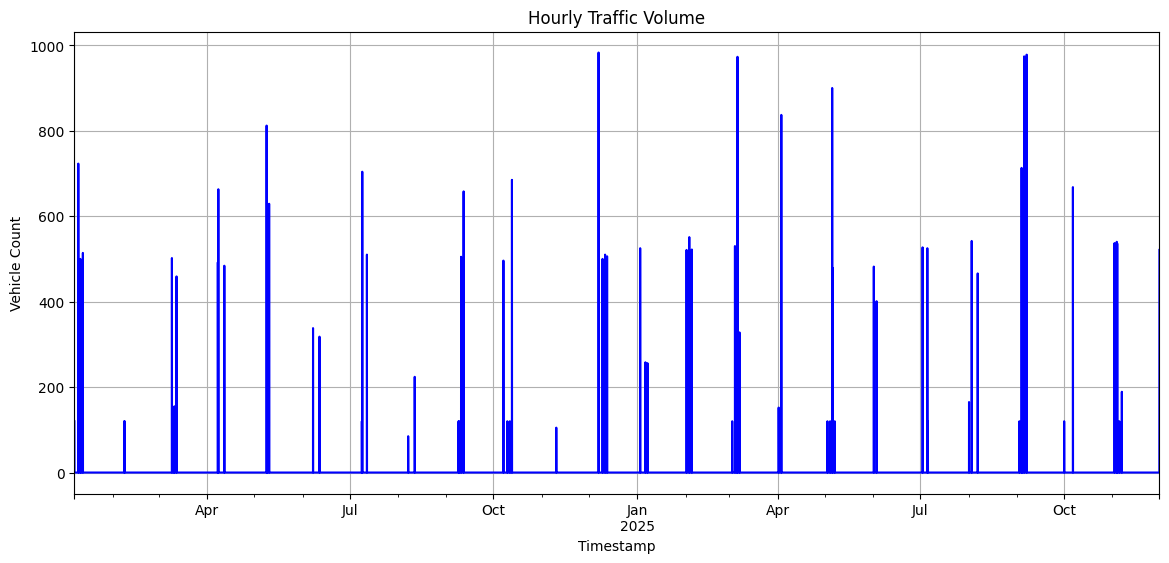

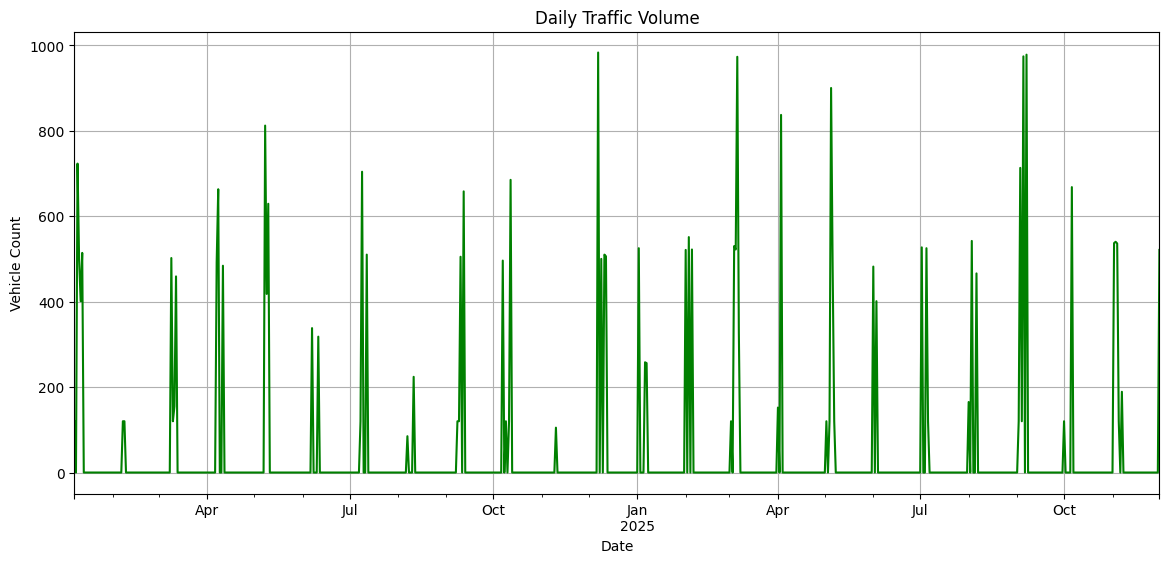

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("C:/Users/diya/OneDrive/เอกสาร/Desktop/trafficdatasetfinal.csv")

# 1. Verify and convert vehicle_count to numeric
print(f"Original vehicle_count dtype: {df['vehicle_count'].dtype}")
print(f"Sample values before conversion:\n{df['vehicle_count'].head()}")

# Convert to numeric, coercing errors to NaN
df['vehicle_count'] = pd.to_numeric(df['vehicle_count'], errors='coerce')

# 2. Check for missing values
print(f"\nMissing values in vehicle_count: {df['vehicle_count'].isna().sum()}")

# 3. Handle missing values (if any)
df = df.dropna(subset=['vehicle_count'])  # Drop rows with missing counts

# 4. Verify conversion
print(f"\nConverted vehicle_count dtype: {df['vehicle_count'].dtype}")
print(f"Sample values after conversion:\n{df['vehicle_count'].head()}")

# 5. Proceed with timestamp conversion and resampling
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.dropna(subset=['timestamp'])
df = df.set_index('timestamp')

# Now resample and plot
hourly_traffic = df['vehicle_count'].resample('h').sum()
daily_traffic = df['vehicle_count'].resample('D').sum()

# Plot hourly traffic
plt.figure(figsize=(14, 6))
hourly_traffic.plot(title='Hourly Traffic Volume', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Vehicle Count')
plt.grid(True)
plt.show()

# Plot daily traffic
plt.figure(figsize=(14, 6))
daily_traffic.plot(title='Daily Traffic Volume', color='green')
plt.xlabel('Date')
plt.ylabel('Vehicle Count')
plt.grid(True)
plt.show()

In [24]:
import pandas as pd

# Identify problematic rows
non_numeric_mask = pd.to_numeric(df['vehicle_count'], errors='coerce').isna()
non_numeric_rows = df[non_numeric_mask]['vehicle_count']

# Show unique problematic values
print("Problematic values in vehicle_count:")
print(non_numeric_rows.unique())

# Show sample of rows with issues
print("\nSample of problematic rows:")
print(df[non_numeric_mask].head(10))

Problematic values in vehicle_count:
[]

Sample of problematic rows:
Empty DataFrame
Columns: [location_id, latitude, longitude, road_name, road_type, speed_limit, lane_count, direction, vehicle_count, congestion_level, travel_time_min, accidenot_reported, accident_severity, weather_condition, road_condition, visibility_meters, signal_status, pedestrian_count, special_eveNT, work_zone, emergency_vehicle, data_source, time_of_day, day_of_week, avg_speed, delay_time]
Index: []

[0 rows x 26 columns]


In [25]:
# 1. Check the data type BEFORE conversion
print("Original dtype:", df['vehicle_count'].dtype)

# 2. Check for missing values BEFORE conversion
print("Missing values before conversion:", df['vehicle_count'].isna().sum())

# 3. Convert to numeric
df['vehicle_count'] = pd.to_numeric(df['vehicle_count'], errors='coerce')

# 4. Check AFTER conversion
print("Converted dtype:", df['vehicle_count'].dtype)
print("Missing values after conversion:", df['vehicle_count'].isna().sum())

# 5. Directly inspect the missing values
if df['vehicle_count'].isna().sum() > 0:
    # Get the rows with missing vehicle_count
    missing_rows = df[df['vehicle_count'].isna()]
    
    # Show the original values from these rows
    print("\nOriginal values in rows with missing vehicle_count:")
    print(missing_rows['vehicle_count'].to_list())  # Show as list instead of unique
    
    # Show the entire row for context
    print("\nSample of full rows with missing vehicle_count:")
    print(missing_rows.head(3))
else:
    print("No missing values found after conversion")

Original dtype: float64
Missing values before conversion: 0
Converted dtype: float64
Missing values after conversion: 0
No missing values found after conversion


DIAGNOSING VEHICLE_COUNT COLUMN

1. INITIAL STATE:
Data type: object
Missing values: 32
Sample values:
0    120
1    120
2    492
3    338
4     85
5    496
6    983
7    197
8    292
9    496
Name: vehicle_count, dtype: object

2. STRING CLEANING:
After cleaning commas and spaces:
Sample values:
0    120
1    120
2    492
3    338
4     85
5    496
6    983
7    197
8    292
9    496
Name: vehicle_count, dtype: object

Non-numeric values found:
['nan']

3. NUMERIC CONVERSION:
Converted dtype: float64
Missing values after conversion: 32

Problematic rows:
    timestamp location_id  latitude  longitude road_name road_type  \
200       NaN         NaN       NaN        NaN       NaN       NaN   
201       NaN         NaN       NaN        NaN       NaN       NaN   
202       NaN         NaN       NaN        NaN       NaN       NaN   
203       NaN         NaN       NaN        NaN       NaN       NaN   
204       NaN         NaN       NaN        NaN       NaN       NaN   
205       NaN     

C:\Users\diya\AppData\Local\Temp\ipykernel_67184\1492951826.py:115: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_traffic = df_clean['vehicle_count'].resample('H').sum()


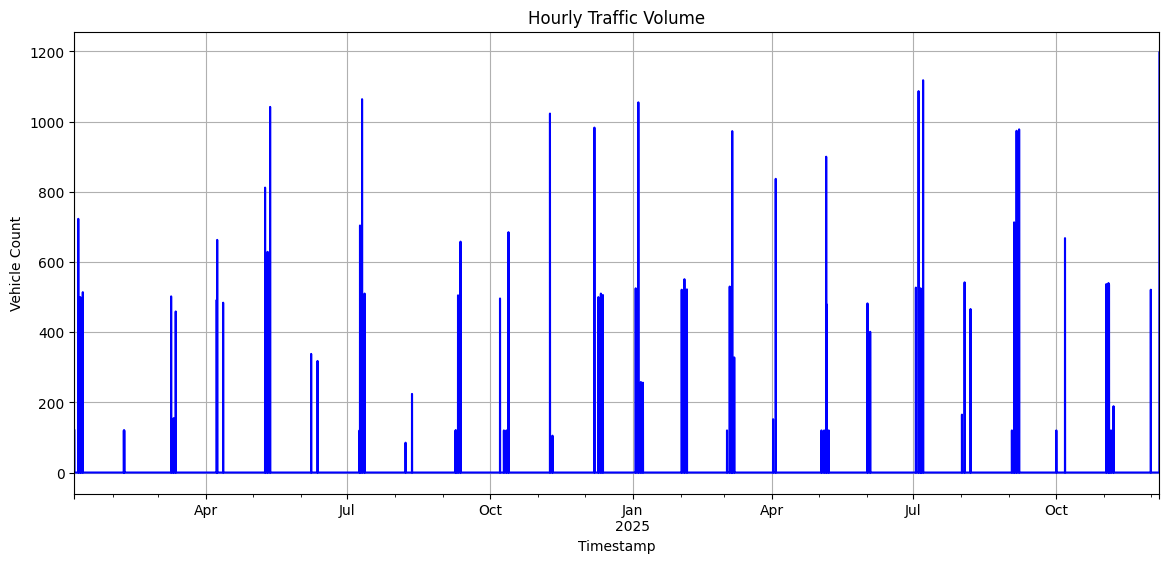

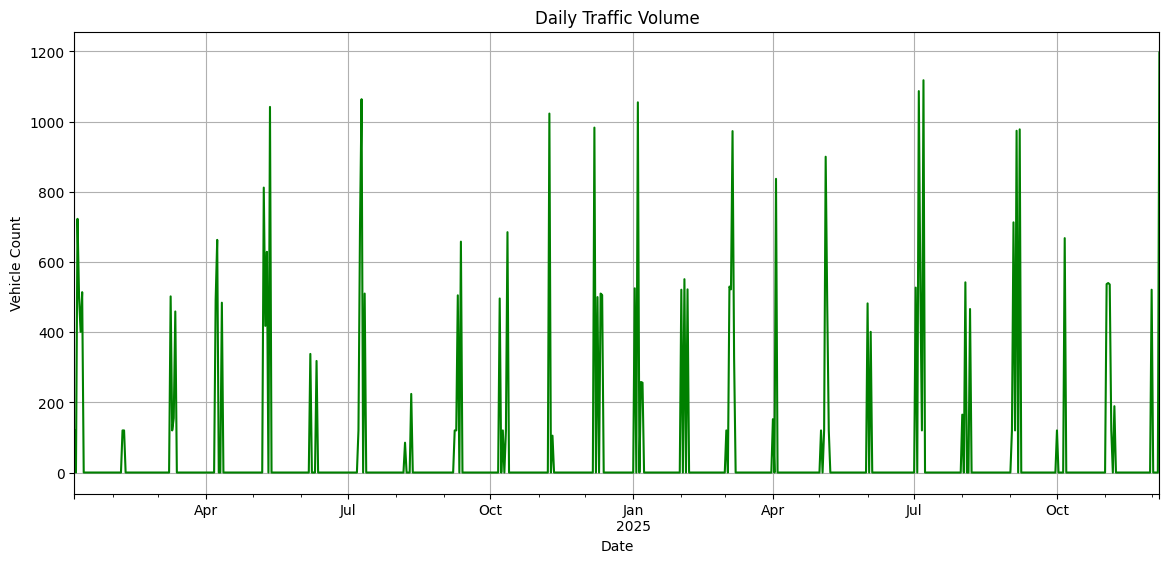


Plots generated successfully!


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (if not already loaded)
df = pd.read_csv("C:/Users/diya/OneDrive/เอกสาร/Desktop/trafficdatasetfinal.csv")


# --------------------------------------------
# STEP 1: DIAGNOSE VEHICLE_COUNT COLUMN
# --------------------------------------------
print("="*50)
print("DIAGNOSING VEHICLE_COUNT COLUMN")
print("="*50)

# Check initial state
print("\n1. INITIAL STATE:")
print(f"Data type: {df['vehicle_count'].dtype}")
print(f"Missing values: {df['vehicle_count'].isna().sum()}")
print(f"Sample values:\n{df['vehicle_count'].head(10)}")

# Check for string representation of numbers
if df['vehicle_count'].dtype == 'object':
    print("\n2. STRING CLEANING:")
    # Remove commas and spaces
    df['vehicle_count'] = df['vehicle_count'].astype(str).str.replace(',', '')
    df['vehicle_count'] = df['vehicle_count'].str.strip()
    
    print("After cleaning commas and spaces:")
    print(f"Sample values:\n{df['vehicle_count'].head(10)}")
    
    # Check for non-numeric characters
    non_numeric = df[~df['vehicle_count'].str.match(r'^-?\d*\.?\d+$', na=False)]
    if not non_numeric.empty:
        print("\nNon-numeric values found:")
        print(non_numeric['vehicle_count'].unique())
    else:
        print("\nAll values appear numeric after cleaning")

# Convert to numeric
print("\n3. NUMERIC CONVERSION:")
df['vehicle_count'] = pd.to_numeric(df['vehicle_count'], errors='coerce')
print(f"Converted dtype: {df['vehicle_count'].dtype}")
print(f"Missing values after conversion: {df['vehicle_count'].isna().sum()}")

# Show problematic rows
if df['vehicle_count'].isna().sum() > 0:
    na_mask = df['vehicle_count'].isna()
    print("\nProblematic rows:")
    print(df[na_mask].head(10))
    
    # Show original values from problematic rows
    print("\nOriginal values in problematic rows:")
    print(df.loc[na_mask, 'vehicle_count'].unique())

# --------------------------------------------
# STEP 2: HANDLE TIMESTAMP COLUMN
# --------------------------------------------
print("\n" + "="*50)
print("HANDLING TIMESTAMP COLUMN")
print("="*50)

# Check initial state
print("\n1. INITIAL STATE:")
print(f"Data type: {df['timestamp'].dtype}")
print(f"Missing values: {df['timestamp'].isna().sum()}")
print(f"Sample values:\n{df['timestamp'].head(5)}")

# Convert to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
print("\n2. AFTER DATETIME CONVERSION:")
print(f"Data type: {df['timestamp'].dtype}")
print(f"Missing values: {df['timestamp'].isna().sum()}")

# Show problematic timestamps
if df['timestamp'].isna().sum() > 0:
    na_ts_mask = df['timestamp'].isna()
    print("\nProblematic timestamp rows:")
    print(df[na_ts_mask].head(10))
    
    # Show original values from problematic timestamps
    print("\nOriginal values in problematic timestamps:")
    print(df.loc[na_ts_mask, 'timestamp'].unique())

# --------------------------------------------
# STEP 3: FINAL CLEANING AND PREPARATION
# --------------------------------------------
print("\n" + "="*50)
print("FINAL CLEANING")
print("="*50)

# Create clean copy
df_clean = df.copy()

# Drop rows with missing critical values
initial_count = len(df_clean)
df_clean = df_clean.dropna(subset=['vehicle_count', 'timestamp'])
final_count = len(df_clean)

print(f"\nDropped {initial_count - final_count} rows with missing values")
print(f"Final missing vehicle_count: {df_clean['vehicle_count'].isna().sum()}")
print(f"Final missing timestamp: {df_clean['timestamp'].isna().sum()}")

# Set timestamp as index
df_clean = df_clean.set_index('timestamp')
print("\nIndex type:", type(df_clean.index))

# --------------------------------------------
# STEP 4: RESAMPLE AND PLOT
# --------------------------------------------
print("\n" + "="*50)
print("RESAMPLING AND PLOTTING")
print("="*50)

# Resample data
hourly_traffic = df_clean['vehicle_count'].resample('H').sum()
daily_traffic = df_clean['vehicle_count'].resample('D').sum()

print("\nHourly traffic sample:")
print(hourly_traffic.head())
print("\nDaily traffic sample:")
print(daily_traffic.head())

# Plot hourly traffic
plt.figure(figsize=(14, 6))
hourly_traffic.plot(title='Hourly Traffic Volume', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Vehicle Count')
plt.grid(True)
plt.show()

# Plot daily traffic
plt.figure(figsize=(14, 6))
daily_traffic.plot(title='Daily Traffic Volume', color='green')
plt.xlabel('Date')
plt.ylabel('Vehicle Count')
plt.grid(True)
plt.show()

print("\nPlots generated successfully!")

C:\Users\diya\AppData\Local\Temp\ipykernel_67184\114875827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='congestion_level', y='vehicle_count', data=df, palette='viridis')


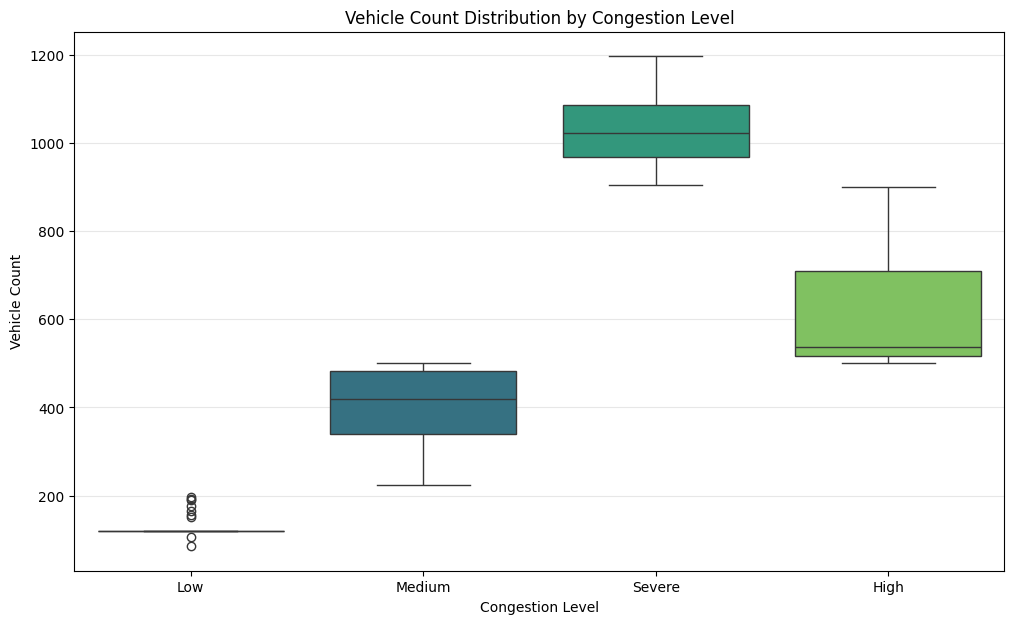

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
sns.boxplot(x='congestion_level', y='vehicle_count', data=df, palette='viridis')
plt.title('Vehicle Count Distribution by Congestion Level')
plt.xlabel('Congestion Level')
plt.ylabel('Vehicle Count')
plt.grid(axis='y', alpha=0.3)
plt.show()

C:\Users\diya\AppData\Local\Temp\ipykernel_67184\3596643032.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


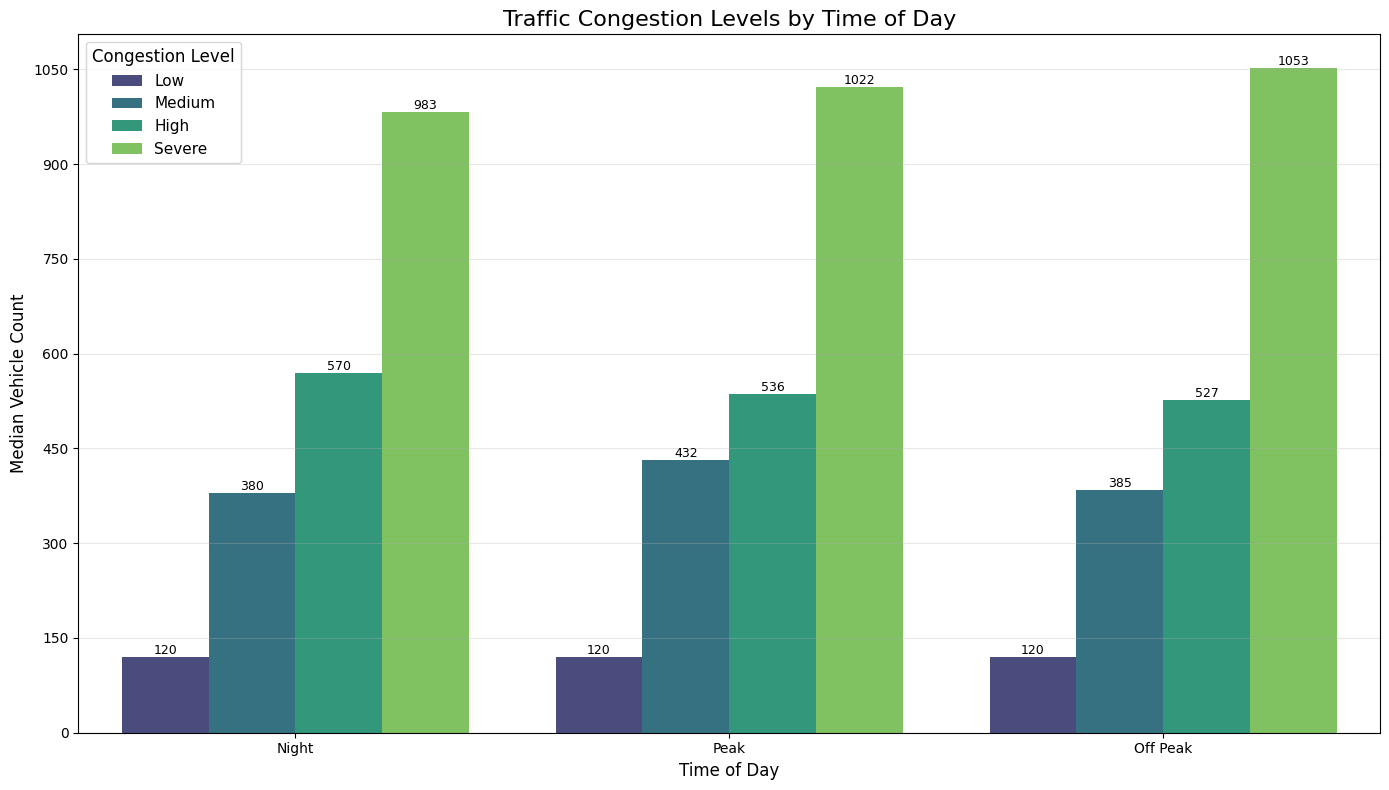

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Load the dataset and skip trailing empty rows
df = pd.read_csv("C:/Users/diya/OneDrive/เอกสาร/Desktop/trafficdatasetfinal.csv")
df = df.dropna(how='all')  # Remove completely empty rows

# Data Cleaning
# Clean and convert vehicle_count
df['vehicle_count'] = (
    df['vehicle_count'].astype(str)
    .str.replace(',', '')
    .str.strip()
    .replace(['', 'NA', 'N/A', 'null', 'NaN', '?', '-'], float('nan'))
)
df['vehicle_count'] = pd.to_numeric(df['vehicle_count'], errors='coerce')

# Clean congestion_level column
df['congestion_level'] = (
    df['congestion_level'].astype(str)
    .str.strip()
    .str.capitalize()
    .replace(['', 'NA', 'N/A', 'null', 'NaN'], pd.NA)
)

# Clean time_of_day column
df['time_of_day'] = (
    df['time_of_day'].astype(str)
    .str.strip()
    .str.replace('-', ' ')  # Handle "Off-Peak"
    .str.title()  # Convert to title case
    .replace(['', 'NA', 'N/A', 'null', 'NaN'], pd.NA)
)

# Filter out rows with missing critical values
df_clean = df.dropna(subset=['congestion_level', 'time_of_day', 'vehicle_count'])

# Create a custom order for time of day
time_order = ['Night', 'Peak', 'Off Peak']

# Create a custom order for congestion levels
congestion_order = ['Low', 'Medium', 'High', 'Severe']

# Create the plot
plt.figure(figsize=(14, 8))
sns.barplot(
    x='time_of_day',
    y='vehicle_count',
    hue='congestion_level',
    data=df_clean,
    order=time_order,
    hue_order=congestion_order,
    ci=None,  # Disable confidence intervals
    palette='viridis',
    estimator='median'  # Use median to handle outliers
)

# Customize the plot
plt.title('Traffic Congestion Levels by Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Median Vehicle Count', fontsize=12)
plt.legend(title='Congestion Level', title_fontsize=12, fontsize=11)
plt.grid(axis='y', alpha=0.3)

# Improve y-axis formatting
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Add data labels
for p in plt.gca().patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        plt.gca().annotate(
            f'{height:.0f}',
            (p.get_x() + p.get_width() / 2, height),
            ha='center', va='bottom', fontsize=9
        )

plt.tight_layout()
plt.show()

C:\Users\diya\AppData\Local\Temp\ipykernel_67184\2979649362.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


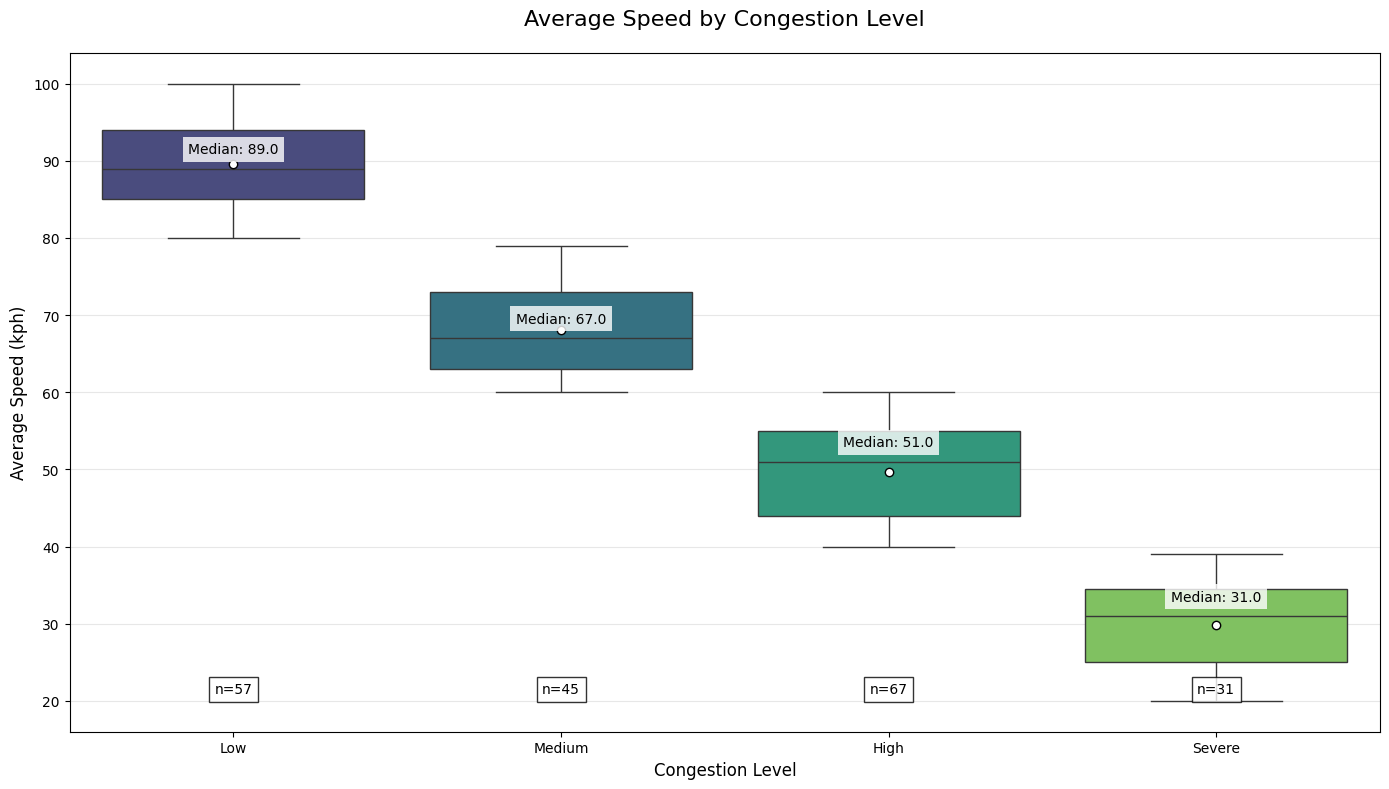

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load and clean data
df = pd.read_csv("C:/Users/diya/OneDrive/เอกสาร/Desktop/trafficdatasetfinal.csv", skip_blank_lines=True)
df = df.dropna(how='all')

# Data Cleaning
# Clean congestion_level
df['congestion_level'] = (
    df['congestion_level'].astype(str)
    .str.strip()
    .str.capitalize()
    .replace(['', 'NA', 'N/A', 'null', 'NaN'], pd.NA)
)

# Clean avg_speed (handle kph units and convert to numeric)
df['avg_speed'] = (
    df['avg_speed'].astype(str)
    .str.replace(' kph', '')
    .str.strip()
    .replace(['', 'NA', 'N/A', 'null', 'NaN'], pd.NA)
)
df['avg_speed'] = pd.to_numeric(df['avg_speed'], errors='coerce')

# Filter valid data
df_clean = df.dropna(subset=['congestion_level', 'avg_speed'])

# Define order for congestion levels
congestion_order = ['Low', 'Medium', 'High', 'Severe']

# Create the visualization
plt.figure(figsize=(14, 8))

# Option 1: Box Plot (shows distribution)
sns.boxplot(
    x='congestion_level',
    y='avg_speed',
    data=df_clean,
    order=congestion_order,
    palette='viridis',
    showmeans=True,
    meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black'}
)

# Option 2: Violin Plot (shows density distribution)
# sns.violinplot(
#     x='congestion_level',
#     y='avg_speed',
#     data=df_clean,
#     order=congestion_order,
#     palette='viridis',
#     inner='quartile'
# )

# Customize the plot
plt.title('Average Speed by Congestion Level', fontsize=16, pad=20)
plt.xlabel('Congestion Level', fontsize=12)
plt.ylabel('Average Speed (kph)', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add statistical annotations
medians = df_clean.groupby('congestion_level')['avg_speed'].median().loc[congestion_order]
for i, med in enumerate(medians):
    plt.text(i, med+2, f'Median: {med:.1f}', ha='center', fontsize=10,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Add sample size labels
counts = df_clean['congestion_level'].value_counts().loc[congestion_order]
for i, count in enumerate(counts):
    plt.text(i, plt.ylim()[0]+5, f'n={count}', ha='center', fontsize=10,
             bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

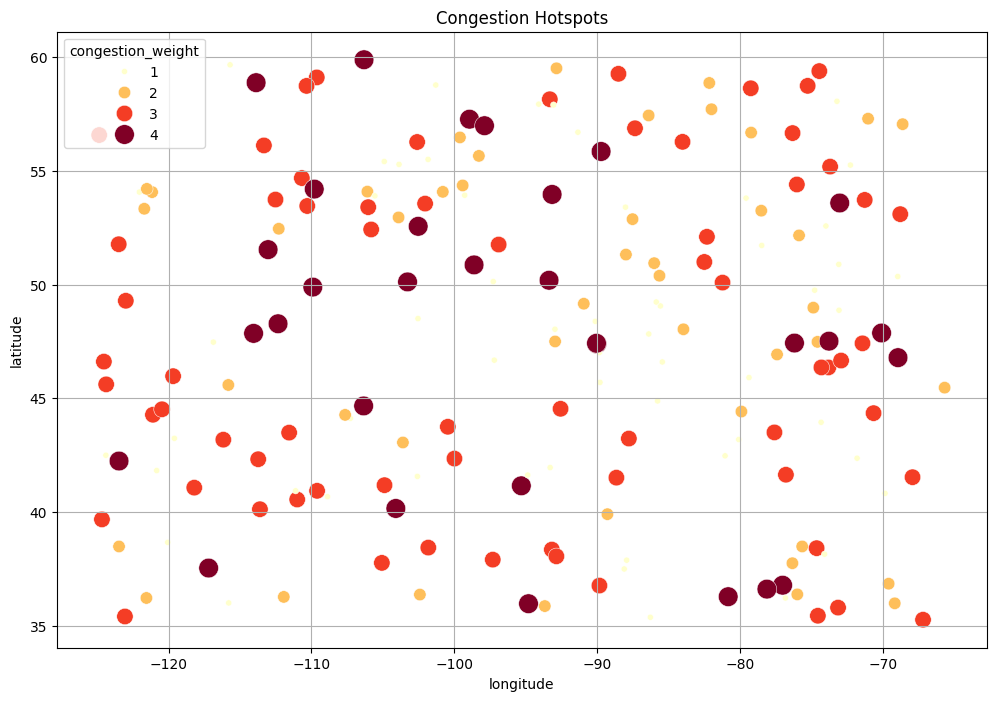

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv("C:/Users/diya/OneDrive/เอกสาร/Desktop/trafficdatasetfinal.csv")
df = df.dropna(subset=['latitude', 'longitude', 'congestion_level'])

# Create congestion weight (numeric scale)
congestion_weights = {'Low': 1, 'Medium': 2, 'High': 3, 'Severe': 4}
df['congestion_weight'] = df['congestion_level'].map(congestion_weights)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='longitude',
    y='latitude',
    size='congestion_weight',
    hue='congestion_weight',
    sizes=(20, 200),
    palette='YlOrRd'
)
plt.title('Congestion Hotspots')
plt.grid()
plt.show()

In [40]:
cols=['timestamp','speed_limit','vehicle_count','travel_time_min']
df[cols] = df[cols].apply(pd.to_numeric , errors='coerce')
print("\nAfter conversion:")
print(df[cols].dtypes)
print("\nSample data:")
print(df[cols].head())


After conversion:
timestamp          float64
speed_limit        float64
vehicle_count      float64
travel_time_min    float64
dtype: object

Sample data:
   timestamp  speed_limit  vehicle_count  travel_time_min
0        NaN          NaN          120.0            259.0
1        NaN          NaN          120.0            580.0
2        NaN          NaN          492.0            120.0
3        NaN          NaN          338.0            700.0
4        NaN          NaN           85.0            650.0


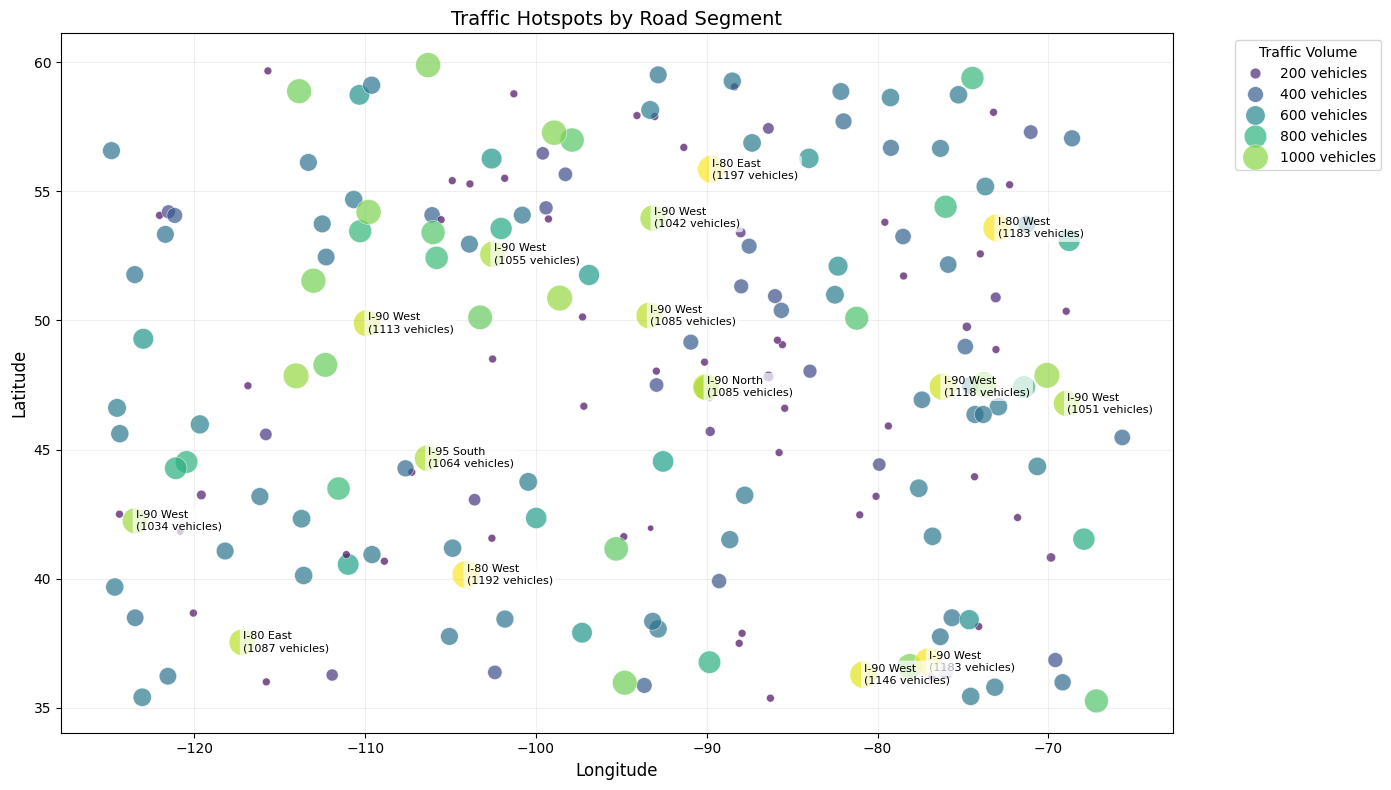

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("C:/Users/diya/OneDrive/เอกสาร/Desktop/trafficdatasetfinal.csv")

# Clean data: convert vehicle_count to numeric (handling commas)
df['vehicle_count'] = df['vehicle_count'].astype(str).str.replace(',', '').astype(float)

# Drop rows with missing coordinates or vehicle counts
df = df.dropna(subset=['latitude', 'longitude', 'road_name', 'vehicle_count'])

# Aggregate traffic by location
traffic_hotspots = df.groupby(['road_name', 'latitude', 'longitude'])['vehicle_count'].sum().reset_index()

# Create the plot
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(
    data=traffic_hotspots,
    x='longitude',
    y='latitude',
    size='vehicle_count',
    hue='vehicle_count',
    sizes=(20, 400),
    palette='viridis',
    alpha=0.7
)

# Add labels for top N busiest locations
top_n = 15
for i, row in traffic_hotspots.nlargest(top_n, 'vehicle_count').iterrows():
    plt.text(
        row['longitude'] + 0.05,  # Small offset to avoid overlap
        row['latitude'],
        f"{row['road_name']}\n({int(row['vehicle_count'])} vehicles)",
        fontsize=8,
        ha='left',
        va='center',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round')
    )

plt.title('Traffic Hotspots by Road Segment', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, alpha=0.2)

# Adjust legend for better readability
handles, labels = scatter.get_legend_handles_labels()
plt.legend(
    handles[:5], 
    [f"{int(float(label))} vehicles" for label in labels[:5]],
    title='Traffic Volume',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

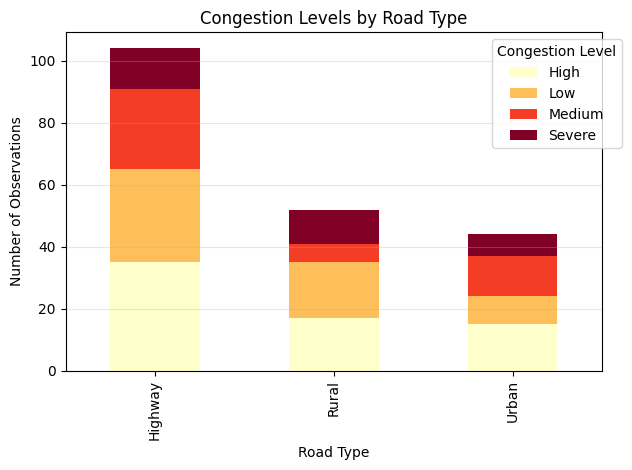

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df = pd.read_csv("C:/Users/diya/OneDrive/เอกสาร/Desktop/trafficdatasetfinal.csv")
df = df.dropna(subset=['congestion_level', 'road_type'])

# Create count of congestion levels per road type
congestion_counts = df.groupby(['road_type', 'congestion_level']).size().unstack()

# Plot stacked bars
plt.figure(figsize=(10, 6))
congestion_counts.plot(kind='bar', stacked=True, colormap='YlOrRd')
plt.title('Congestion Levels by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Observations')
plt.legend(title='Congestion Level', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

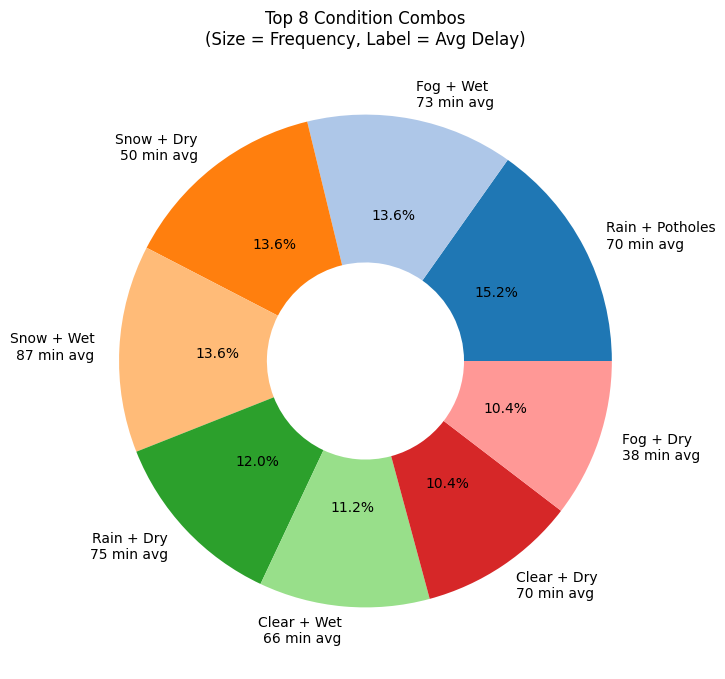

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:/Users/diya/OneDrive/เอกสาร/Desktop/trafficdatasetfinal.csv")
df['combo'] = df['weather_condition'] + " + " + df['road_condition']
top_combos = df.groupby('combo')['delay_time'].agg(['count', 'mean']).nlargest(8, 'count')

# Create donut chart
plt.figure(figsize=(10, 8))
plt.pie(
    top_combos['count'],
    labels=[f"{label}\n{int(mean)} min avg" for label, mean in zip(top_combos.index, top_combos['mean'])],
    autopct='%1.1f%%',
    wedgeprops={'width':0.6},
    colors=plt.cm.tab20.colors
)
plt.title('Top 8 Condition Combos\n(Size = Frequency, Label = Avg Delay)')
plt.gca().add_artist(plt.Circle((0,0), 0.3, fc='white'))  # Make it a donut
plt.show()

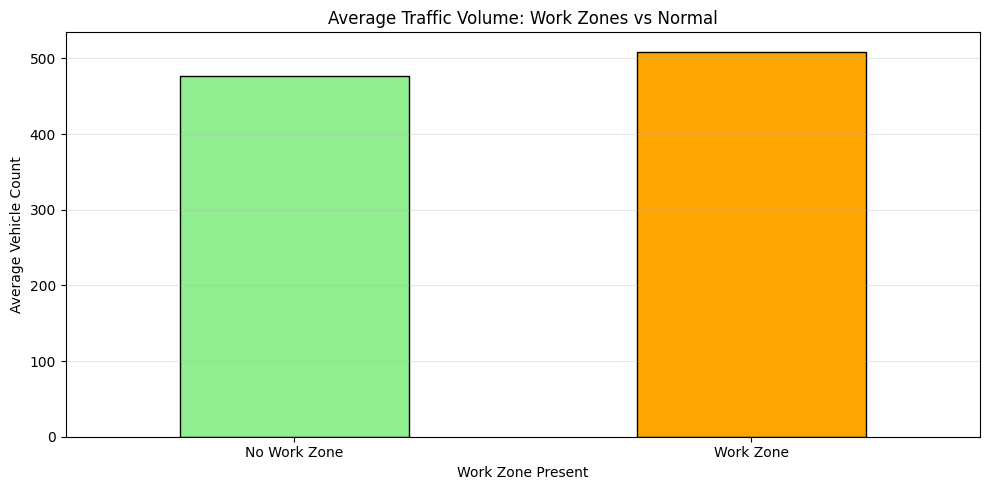

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("C:/Users/diya/OneDrive/เอกสาร/Desktop/trafficdatasetfinal.csv")

# Convert vehicle_count to numeric (handling commas)
df['vehicle_count'] = df['vehicle_count'].astype(str).str.replace(',', '').astype(float)

# Create plot
plt.figure(figsize=(10, 5))
df.groupby('work_zone')['vehicle_count'].mean().plot(
    kind='bar',
    color=['lightgreen', 'orange'],
    edgecolor='black'
)
plt.title('Average Traffic Volume: Work Zones vs Normal')
plt.xlabel('Work Zone Present')
plt.ylabel('Average Vehicle Count')
plt.xticks([0, 1], ['No Work Zone', 'Work Zone'], rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

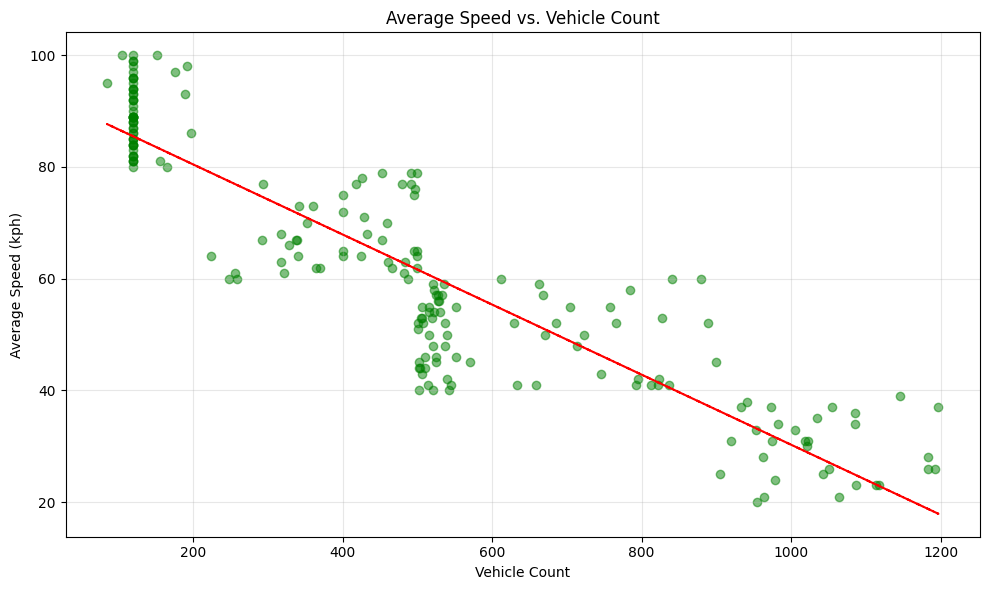

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and clean data
df = pd.read_csv("C:/Users/diya/OneDrive/เอกสาร/Desktop/trafficdatasetfinal.csv")
df = df.dropna(subset=['avg_speed', 'vehicle_count'])

# Convert vehicle_count to numeric (handling commas if needed)
df['vehicle_count'] = pd.to_numeric(df['vehicle_count'].astype(str).str.replace(',', ''), errors='coerce')

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    x=df['vehicle_count'],
    y=df['avg_speed'],
    alpha=0.5,
    color='green'
)

# Add trendline
z = np.polyfit(df['vehicle_count'], df['avg_speed'], 1)
p = np.poly1d(z)
plt.plot(df['vehicle_count'], p(df['vehicle_count']), "r--")

plt.title('Average Speed vs. Vehicle Count')
plt.xlabel('Vehicle Count')
plt.ylabel('Average Speed (kph)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()